In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,076 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160815 files and d

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
#plt.rc('font', family='AppleGothic')   # MacOS font
import pandas as pd

In [ ]:
instas_df = pd.DataFrame([])
folder='/content/drive/MyDrive/Colab Notebooks/dt2/insta/'
f_list=['210708_crawling_Gangneung.xlsx', 'crawling_GangneungGwanGwang.xlsx','crawling_GangneungTour.xlsx']

for fname in f_list:
    fpath = folder + fname
    temp = pd.read_excel(fpath)
    instas_df = instas_df.append(temp)

In [ ]:
instas_df.columns = ['content', 'date','like','place','tags']

In [ ]:
instas_df.head()

content  ...                                               tags
0  (협찬) 강원도 강릉 가장 핫한 맛집"신리광장"샤브샤브 맛나고 닭강정 속초시장보다 ...  ...  ['#강릉맛집', '#강릉카페', '#강릉맛집추천', '#주문진맛집', '#주문진카...
1  (협찬) 강릉 해변 맛집으로 소문난 #강문떡갈비📌 강릉시 강문동 172 강문떡갈비현...  ...  ['#강문떡갈비📌', '#강릉맛집', '#경포대맛집', '#강릉맛집추천', '#강릉...
2  (협찬) 강릉에서 정말 유명한 대동면옥 다녀왔어요!1970년도 부터 오픈해서역사도 ...  ...  ['#강릉맛집', '#주문진맛집', '#강릉맛집추천', '#강릉가볼만한곳', '#강...
3  (협찬)강릉 현지인 단골맛집 맛드린 입니다~맨날 강릉와서 뻔한거 먹지말고 강릉 특산...  ...  ['#강릉맛집', '#맛드린', '#경포대맛집', '#강릉맛집추천', '#강릉먹거리...
4  ..오늘 택배 라인업 신메뉴는#민초도독휘낭시에 입니다 🍃기존 민트초코칩 휘낭시에에5...  ...  ['#민초도독휘낭시에', '#돌체테리아픽업예약방법', '#돌체테리아', '#돌체테리...

[5 rows x 5 columns]

In [ ]:
instas_df.shape

(820, 5)

In [ ]:
instas_df.drop_duplicates(subset=['content'], inplace=True)
instas_df.to_excel('/content/drive/MyDrive/Colab Notebooks/dt2/insta/crawling_gang_raw.xlsx', index=False)

In [ ]:
raw_total=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/dt2/insta/crawling_gang_raw.xlsx' )
raw_total.head()

content  ...                                               tags
0  (협찬) 강원도 강릉 가장 핫한 맛집"신리광장"샤브샤브 맛나고 닭강정 속초시장보다 ...  ...  ['#강릉맛집', '#강릉카페', '#강릉맛집추천', '#주문진맛집', '#주문진카...
1  (협찬) 강릉 해변 맛집으로 소문난 #강문떡갈비📌 강릉시 강문동 172 강문떡갈비현...  ...  ['#강문떡갈비📌', '#강릉맛집', '#경포대맛집', '#강릉맛집추천', '#강릉...
2  (협찬) 강릉에서 정말 유명한 대동면옥 다녀왔어요!1970년도 부터 오픈해서역사도 ...  ...  ['#강릉맛집', '#주문진맛집', '#강릉맛집추천', '#강릉가볼만한곳', '#강...
3  (협찬)강릉 현지인 단골맛집 맛드린 입니다~맨날 강릉와서 뻔한거 먹지말고 강릉 특산...  ...  ['#강릉맛집', '#맛드린', '#경포대맛집', '#강릉맛집추천', '#강릉먹거리...
4  ..오늘 택배 라인업 신메뉴는#민초도독휘낭시에 입니다 🍃기존 민트초코칩 휘낭시에에5...  ...  ['#민초도독휘낭시에', '#돌체테리아픽업예약방법', '#돌체테리아', '#돌체테리...

[5 rows x 5 columns]

In [ ]:
raw_total.shape

(768, 5)

### tag 워드 클라우드

In [ ]:
tags_total = []
for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

tags_total[:10]

['#강릉맛집',
 '#강릉카페',
 '#강릉맛집추천',
 '#주문진맛집',
 '#주문진카페',
 '#강릉가볼만한곳',
 '#강릉데이트',
 '#강릉현지인맛집',
 '#강릉술집',
 '#강릉핫플']

In [ ]:
! pip install collection

  Created wheel for collection: filename=collection-0.1.6-cp37-none-any.whl size=5118 sha256=a1b2afbf73a1846f3f16b9320f198d5c48ad67c923a2fffc5832a611ae1b78df
  Stored in directory: /root/.cache/pip/wheels/9e/f2/2b/a611b0dc83b770763e7962500ef158c09dc8161d3fce6e73de
Successfully built collection


In [ ]:
from collections import Counter
#https://colab.research.google.com/github/littlecolumns/ds4j-notebooks/blob/master/text-analysis/notebooks/Counting%20words%20with%20Python's%20Counter.ipynb#scrollTo=K9A4muXGggfe

tag_count = Counter(tags_total)

In [ ]:
stopword = ['#맞팔', '#일상', '', '#이태원','#DevelopmentCorporation', '#H-BTS','#visit']

tag_selected = []
for tag in tags_total:
    if tag not in stopword:
        tag_selected.append(tag)

tag_selected_counts = Counter(tag_selected)
tag_selected_counts.most_common(80)

In [ ]:
tag_counts_df = pd.DataFrame(tag_selected_counts.most_common(30))
tag_counts_df.columns=['tag','counts']

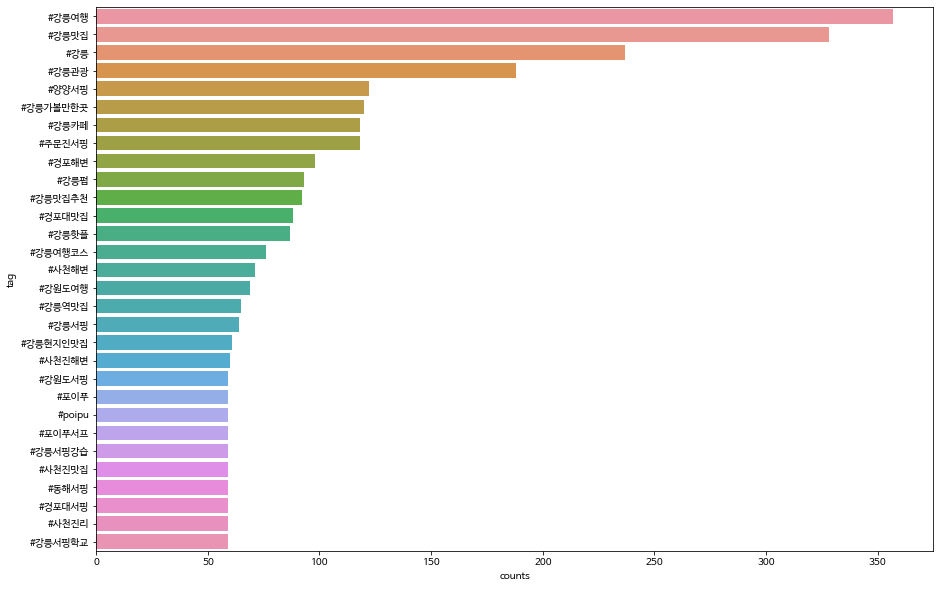

In [ ]:
import seaborn as sns


plt.figure(figsize = (15,10))
sns.barplot(x='counts', y='tag', data=tag_counts_df) 
plt.show()

In [ ]:
! pip install wordcloud

In [ ]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['DejaVu Sans Display',
 'STIXNonUnicode',
 'cmtt10',
 'DejaVu Sans Mono',
 'cmb10',
 'DejaVu Sans Mono',
 'cmsy10',
 'DejaVu Sans',
 'cmmi10',
 'STIXGeneral',
 'DejaVu Sans',
 'STIXNonUnicode',
 'STIXGeneral',
 'STIXSizeTwoSym',
 'DejaVu Serif',
 'STIXSizeFourSym',
 'cmss10',
 'STIXSizeFourSym',
 'DejaVu Sans',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'cmex10',
 'cmr10',
 'STIXSizeThreeSym',
 'STIXSizeOneSym',
 'STIXNonUnicode',
 'DejaVu Serif Display',
 'STIXSizeOneSym',
 'STIXSizeThreeSym',
 'DejaVu Sans',
 'DejaVu Serif',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'STIXSizeFiveSym',
 'STIXSizeTwoSym',
 'STIXNonUnicode',
 'DejaVu Serif',
 'Liberation Sans',
 'Liberation Sans',
 'Liberation Serif',
 'Liberation Sans Narrow',
 'Humor Sans',
 'Liberation Sans Narrow',
 'Liberation Mono',
 'NanumSquareRound',
 'Liberation Mono',
 'NanumSquare',
 'Liberation Sans Narrow',
 'Liberation Sans',
 'NanumMyeongjo',
 'Liberation Serif',
 'Liberation Sans Narrow',
 'NanumSquareRound',
 

In [ ]:
from wordcloud import WordCloud
plt.rc('font',family='NanumSquareRound')

In [ ]:
# import platform

# if platform.system() == 'Windows':   #윈도우의 경우
#      font_path = "c:/Windows/Fonts/malgun.ttf"
# # elif platform.system() == "Darwin":   #Mac 의 경우
# #     font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"


In [ ]:
tag_counts_df = pd.DataFrame(tag_selected_counts.most_common(80))
tag_counts_df.columns=['tag','counts']

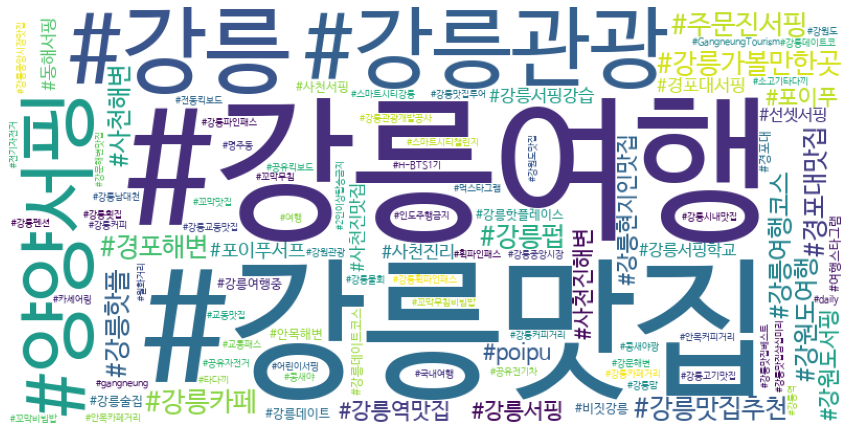

In [ ]:
fontpath = '/user/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
wordcloud = WordCloud(font_path= fontpath,
                      background_color = 'white',
                      width = 800,
                      height=400,
                      max_words=100,
                      relative_scaling=0.3)

wordcloud.generate_from_frequencies(tag_selected_counts)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/dt2/insta/210712_tag_wordcloud.png')

### 좋아요 시각화

In [ ]:
raw_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  768 non-null    object
 1   date     768 non-null    object
 2   like     768 non-null    object
 3   place    428 non-null    object
 4   tags     768 non-null    object
dtypes: object(5)
memory usage: 30.1+ KB


In [ ]:
raw_total.like.unique()

array([0, '641', '1,207', '5', '27', '9', '7', '2', '4', '1', '13', '22',
       '364', '14', '40', '18', '39', '197', '10', '25', '17', '12', '20',
       '34', '47', '26', '252', '60', '92', '180', '32', '55', '23',
       '27명', '3', '158', '15', '8', '984', '36', '51', '28', '87', '237',
       '284', '54', '37', '69', '61', '30', '44', '131', '102', '168명',
       '31', '41', '11', '184', '56', '19', '29명', '125', '146', '175',
       '52', '113', '207', '62', '88', '65', '21', '59', '56명', '163',
       '72', '109', '33', '43', '46', '66', '78명', '16', '6', '68', '63',
       133, 197, 309, 130, 138, 124, 567, 145, 285, 12, 2, 3, 4, 5, 51,
       21, 37, 17, 39, 6, 98, 25, 36, 10, 90, 34, 28, 43, 29, 54, 27, 80,
       63, 104, 47, 83, 52, 18, 68, 30, 86, 159, 48, 33, 75, 71, 69, 89,
       57, 56, 23, 15, 9, 8, 13, 11, 62, 65, 87, 22, 44, 194, 105, 35, 73,
       112, 16, 153, 76, 40, 7, 26, 79, 58, 116, 74, 20, 137, 72, 91, 78,
       216, 49, 45, 46, 32, 38, 136, 132, 814, 77,

In [ ]:
#','를 없애주고 type변환

like_df = []
for likes in raw_total['like']:
    like = str(likes)
    a = like.replace(',','').replace('명','')
    like_df.append(int(a))

raw_total['like'] = like_df
raw_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  768 non-null    object
 1   date     768 non-null    object
 2   like     768 non-null    int64 
 3   place    428 non-null    object
 4   tags     768 non-null    object
dtypes: int64(1), object(4)
memory usage: 30.1+ KB


In [ ]:
# 좋아요 높은 순으로 정리
raw_total.head()


content  ...                                               tags
0  (협찬) 강원도 강릉 가장 핫한 맛집"신리광장"샤브샤브 맛나고 닭강정 속초시장보다 ...  ...  ['#강릉맛집', '#강릉카페', '#강릉맛집추천', '#주문진맛집', '#주문진카...
1  (협찬) 강릉 해변 맛집으로 소문난 #강문떡갈비📌 강릉시 강문동 172 강문떡갈비현...  ...  ['#강문떡갈비📌', '#강릉맛집', '#경포대맛집', '#강릉맛집추천', '#강릉...
2  (협찬) 강릉에서 정말 유명한 대동면옥 다녀왔어요!1970년도 부터 오픈해서역사도 ...  ...  ['#강릉맛집', '#주문진맛집', '#강릉맛집추천', '#강릉가볼만한곳', '#강...
3  (협찬)강릉 현지인 단골맛집 맛드린 입니다~맨날 강릉와서 뻔한거 먹지말고 강릉 특산...  ...  ['#강릉맛집', '#맛드린', '#경포대맛집', '#강릉맛집추천', '#강릉먹거리...
4  ..오늘 택배 라인업 신메뉴는#민초도독휘낭시에 입니다 🍃기존 민트초코칩 휘낭시에에5...  ...  ['#민초도독휘낭시에', '#돌체테리아픽업예약방법', '#돌체테리아', '#돌체테리...

[5 rows x 5 columns]

In [ ]:
like_df = raw_total[['date','like']]
like_df

date  like
0    2021-07-08     0
1    2021-07-07     0
2    2021-07-05     0
3    2021-07-08     0
4    2021-07-08   641
..          ...   ...
763  2021-06-12     0
764  2021-06-12    15
765  2021-06-12   110
766  2021-06-12    11
767  2021-06-12    38

[768 rows x 2 columns]

In [ ]:
like_top30 = like_df.sort_values('like',ascending=False).head(30)
like_top30

date  like
503  2021-06-11  4538
500  2021-06-11  1880
5    2021-07-05  1207
499  2021-06-08  1015
103  2021-07-08   984
452  2021-05-08   814
752  2021-06-12   668
4    2021-07-08   641
729  2021-06-12   627
279  2020-12-03   567
695  2021-06-12   513
703  2021-06-12   434
501  2021-06-11   428
35   2021-07-08   364
707  2021-06-12   360
506  2021-06-09   339
644  2020-06-07   314
645  2020-06-06   309
275  2020-12-29   309
281  2020-10-31   285
123  2021-07-08   284
643  2020-06-08   282
73   2021-07-08   252
122  2021-07-08   237
582  2021-06-12   225
502  2021-06-11   219
428  2021-05-14   216
504  2021-06-10   213
589  2021-06-12   208
204  2021-07-08   207

<Figure size 1440x720 with 0 Axes>

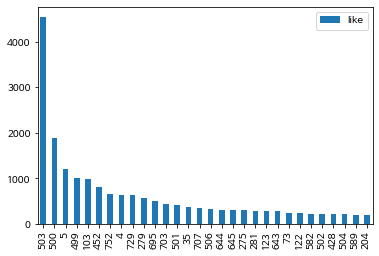

In [ ]:
plt.figure(figsize = (20,10))
like_top30.plot(kind='bar')
plt.show()